In [1]:
import os
import sys
sys.path.append("/mnt/code")

In [2]:
import wandb
wandb.login(anonymous="allow")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: anony-moose-260341207479544576. Use `wandb login --relogin` to force relogin


True

In [3]:
# The following import and function call are the only additions to code required
# to automatically log metrics and parameters to MLflow.
import mlflow
from domino_mlflow_utils.mlflow_utilities import *
mlflow_utils = DominoMLflowUtilities()


In [4]:
run = wandb.init(project="my-wonderful-project", sync_tensorboard=True)

2024-01-17 14:23:29.729820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/oracle/instantclient_12_1:/usr/lib/jvm/java-11-openjdk-amd64/jre/lib/amd64/server:
2024-01-17 14:23:29.729850: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
import os
## Apply Autologging for Tensorflow
mlflow.tensorflow.autolog()
experiment_name= os.environ['DOMINO_PROJECT_NAME'] + "-mlflow_tensorboard"
mlflow_utils.init(experiment_name)

Checking for active runs, Active Run= None
Started new run with run_id: e9bbe9ea9bba4a1591794cb47f22b880


In [6]:
import os
# Don't use GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
"""Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
"""
import numpy as np
import wandb
run = wandb.init(project="my-wonderful-project", sync_tensorboard=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer


mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
      return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
      ])

model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


2024-01-17 14:23:59.407186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/oracle/instantclient_12_1:/usr/lib/jvm/java-11-openjdk-amd64/jre/lib/amd64/server:
2024-01-17 14:23:59.407223: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-17 14:23:59.407249: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (run-65a7dded12b6f32d73f25859-bl6sc): /proc/driver/nvidia/version does not exist
2024-01-17 14:23:59.407502: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from tbparse import SummaryReader
#reader = SummaryReader(log_dir, extra_columns={'dir_name'})
#df = reader.tensors
tmpdirs = {}
tmpdirs['tensorflow'] = '/tmp/logs-4'
log_dir = '/tmp/logs-4'
print(log_dir)
writer = tf.summary.create_file_writer('/tmp/logs-4')
writer.set_as_default()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/tmp/logs-4',histogram_freq=1,write_graph=False, write_images=False)
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])



wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`
wandb: WARNING Found log directory outside of given root_logdir, dropping given root_logdir for event file in /tmp/logs-4


/tmp/logs-4


2024-01-17 14:25:14.292988: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2024-01-17 14:25:14.293022: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2024-01-17 14:25:14.293313: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2024/01/17 14:25:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '53f5c0bf99834bfe973d54179d2ff2e1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`
wandb: WARNING Found log directory outside of given root_logdir, dropping given root_logdir for event file in /tmp/logs-4/train


Epoch 1/5
  25/1875 [..............................] - ETA: 13s - loss: 0.0420 - accuracy: 0.9887

2024-01-17 14:25:15.795921: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2024-01-17 14:25:15.795960: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2024-01-17 14:25:15.806534: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2024-01-17 14:25:15.807072: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2024-01-17 14:25:15.807916: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/logs-4/train/plugins/profile/2024_01_17_14_25_15
2024-01-17 14:25:15.808511: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /tmp/logs-4/train/plugins/profile/2024_01_17_14_25_15/run-65a7dded12b6f32d73f25859-bl6sc.trace.json.gz
2024-01-17 14:25:15.809148: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /tmp/logs-4/train/plugins/profile/2024_01_

1870/1875 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9826

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`
wandb: WARNING Found log directory outside of given root_logdir, dropping given root_logdir for event file in /tmp/logs-4/validation


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0536 - accuracy: 0.9825 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0581 - val_accuracy: 0.9803
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0704 - val_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.0656 - val_accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0658 - val_accuracy: 0.9813


2024/01/17 14:26:16 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/01/17 14:26:16 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpey8tatb8/model/data/model/assets


In [ ]:
import matplotlib.pyplot as plt
log_dir = '/tmp/logs-4/train'
reader = SummaryReader(log_dir, pivot=True)
reader = SummaryReader(log_dir)
df = reader.tensors

# Set background
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Choose color palettes for the distributions
pal = sns.color_palette("Oranges", 20)[5:-5]
# Initialize the FacetGrid object (stacking multiple plots)
g = sns.FacetGrid(df, row='step', hue='step', aspect=15, height=.4, palette=pal)

def plot_subplots(x, color, label, data):
  ax = plt.gca()
  ax.text(0, .08, label, fontweight="bold", color=color,
          ha="left", va="center", transform=ax.transAxes)
  print(data)
  buckets = data['dist'].iloc[0]
  hist_dict = SummaryReader.tensor_to_histogram(buckets)
  counts = hist_dict['counts']
  limits = hist_dict['limits']
  x = np.linspace(limits[0], limits[-1], 15)
  x, y = SummaryReader.histogram_to_pdf(counts, limits, x)
  # Draw the densities in a few steps
  sns.lineplot(x=x, y=y, clip_on=False, color="w", lw=2)
  ax.fill_between(x, y, color=color)
# Plot each subplots with df[df['step']==i]
g.map_dataframe(plot_subplots, None)

# Add a bottom line for each subplot
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Set the subplots to overlap
# Set the subplots to overlap (i.e., height of each distribution)
g.figure.subplots_adjust(hspace=-.9)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], xlabel="", ylabel="")
g.despine(bottom=True, left=True)


## Download Tensorboard Logs

The next cell demonstrates how to fetch the tensorboard logs for any run for which these logs have been registered.

A local tensorboard instance can be used to render these logs. The benefit of this approach is that it can be used to register tensorboard logs for any experiment run and can be downloaded when needed for review. They do not have to be stored in your workspace or repo.

You can go to the run artifacts UI to verify the detailed logs.

WANDB shows the following set of additional metrics as compared to MLFLOW. User defined code could provide the same metrics in MLFLOW
![WANDB TENSORBOARD METRICS](./images/wandb_tensorflow_metrics.png)

In [11]:
r = mlflow.active_run()
run_id=r.info.run_id
home_dir = os.path.expanduser('~')
download_path=f'{home_dir}/{run_id}'
mlflow.artifacts.download_artifacts(run_id=run_id,dst_path=download_path)
print(f"The artifacts for {run_id} will be downloaded to the folder {download_path}")
os.listdir(download_path)

AttributeError: 'NoneType' object has no attribute 'info'

In [9]:


mlflow_utils.finish()
wandb.finish()

run_id: 3d4d9a4bb82543738c0bcf6f227a2970; status: RUNNING
--


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


global_step,▁▃▃▆██
logs-4/train/epoch_accuracy,▁▇█
logs-4/train/epoch_loss,█▂▁
logs-4/train/global_step,█▁▅▅█
logs-4/validation/epoch_accuracy,▁▅█
logs-4/validation/epoch_loss,█▃▁
logs-4/validation/evaluation_accuracy_vs_iterations,▁▅█
logs-4/validation/evaluation_loss_vs_iterations,█▃▁
logs-4/validation/global_step,▁▅█
global_step,5625
logs-4/train/epoch_accuracy,0.97853


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from collections import defaultdict, namedtuple
from typing import List
import tensorflow as tf
from tensorflow.core.util import event_pb2 

TensorBoardImage = namedtuple("TensorBoardImage", ["topic", "image", "cnt"])

data = []
def extract_images_from_event(event_filename: str, image_tags: List[str]):
    step = 0
    my_list = {}
    
    
    topic_counter = defaultdict(lambda: 0)

    serialized_examples = tf.data.TFRecordDataset(event_filename)
    for serialized_example in serialized_examples:
        wtimes,steps,actions = [],[],[]
        #print(dir(serialized_example))
        #print(serialized_example.value_index)
        event = event_pb2.Event.FromString(serialized_example.numpy())
        #print(type(event.summary))
        wtime   = event.wall_time
        step    = event.step
        
        for v in event.summary.value:
            #print(v.tag)
            if v.tag in image_tags:                                
                if v.HasField('histo'):  # event for images using tensor field

                    #print(v.tag)                   
                    hist = v.histo
                    #print(hist)
                    wtimes += [wtime]*int(v.histo.num)
                    steps  += [step] *int(v.histo.num)
                    #print(steps)
                    for num,val in zip(v.histo.bucket,v.histo.bucket_limit):
                        actions += [val] *int(num)
                    my_list[step]={'wtimes':wtimes,'steps':steps,'actions':actions}
                    #print(wtimes)
                    step = step + 1
        
    '''
    for k,v in my_list.items():
        print(k)
        print(v)
    N_points = 10
    n_bins = 5
    '''

    return my_list

def plot_tb(name,my_list):
    # Generate two normal distributions
    x0 = my_list[0]['actions']
    x1 = my_list[1]['actions']
    x2 = my_list[2]['actions']
    x3 = my_list[3]['actions']
    x4 = my_list[4]['actions']
    d1 = {'Step0': x0, 'Step1': x1, 'Step2': x2, 'Step3': x3, 'Step4': x4}

    df = pd.DataFrame(data=d1)

    plt.figure(figsize=(12,5))
    plt.xlabel(name)

    ax1 = df['Step0'].plot(color='blue', grid=True, label='Step0')
    ax2 = df['Step1'].plot(color='green', grid=True,  label='Step1')
    ax2 = df['Step2'].plot(color='red', grid=True,  label='Step2')
    ax2 = df['Step3'].plot(color='cyan', grid=True,  label='Step3')
    ax2 = df['Step4'].plot(color='magenta', grid=True,  label='Step4')


    h1, l1 = ax1.get_legend_handles_labels()
    #h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1, l1, loc=2,fancybox=True, framealpha=0.5)
    plt.show()

                  
 


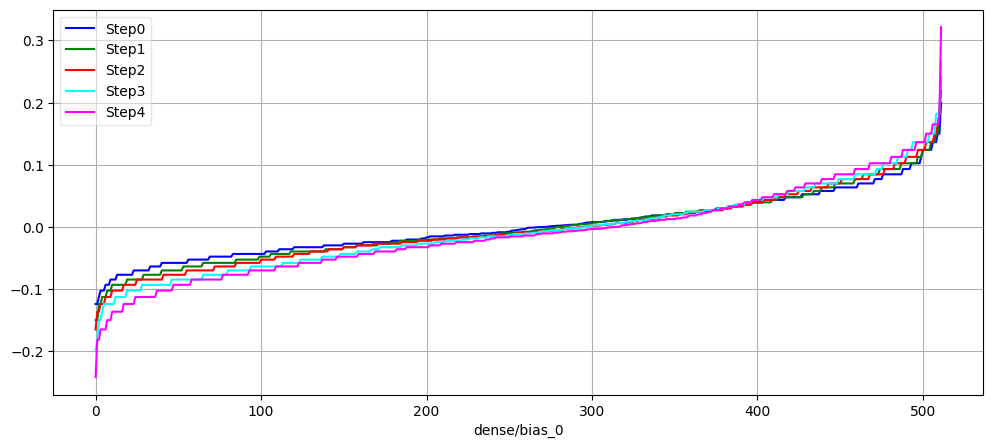

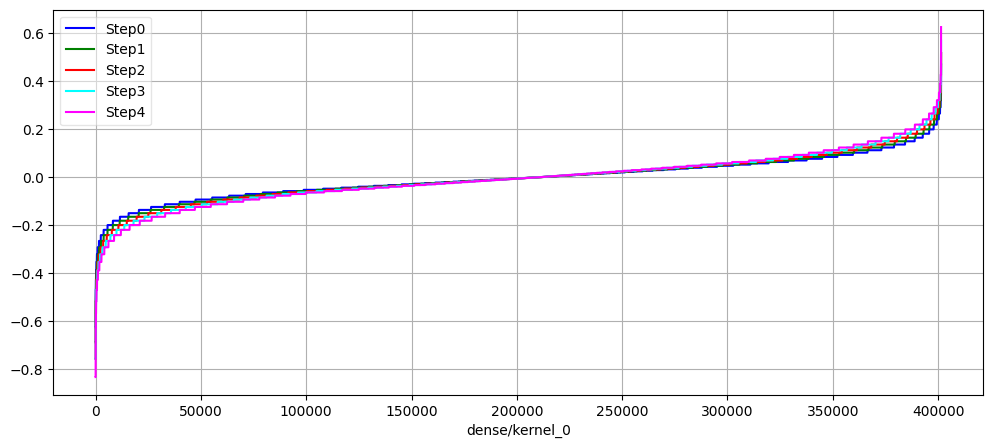

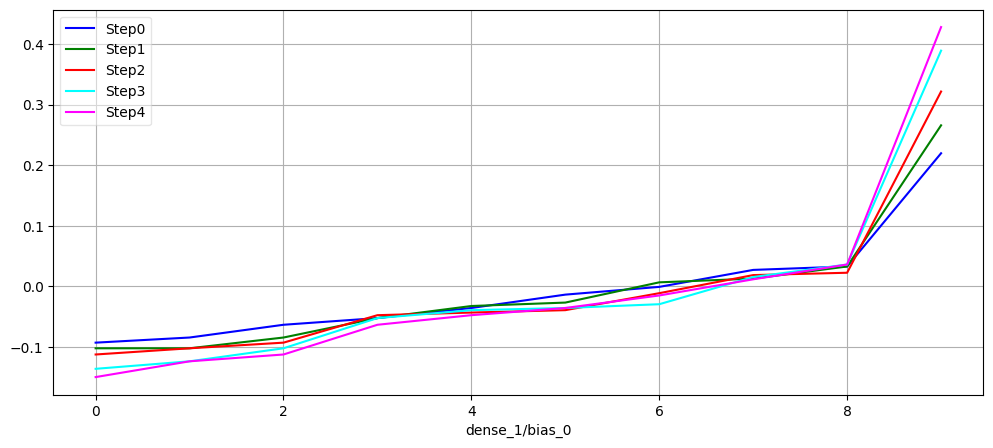

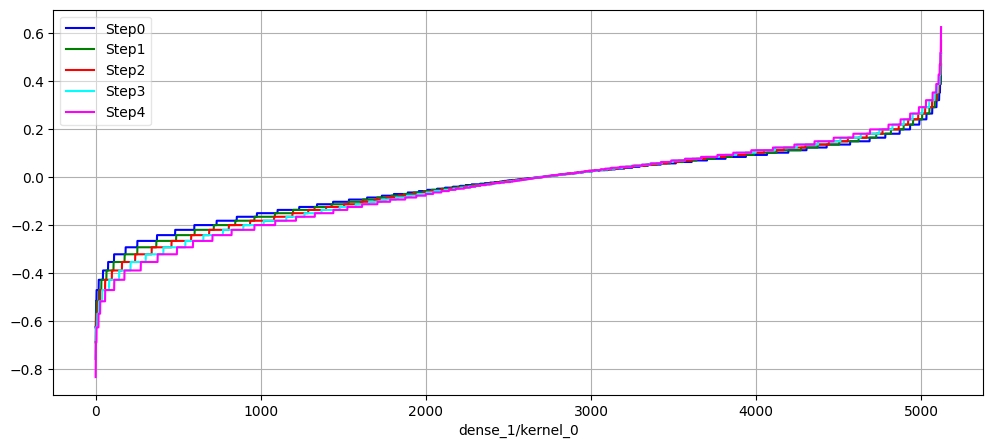

In [14]:
p='/tmp/logs-4/train/events.out.tfevents.1705501515.run-65a7dded12b6f32d73f25859-bl6sc.902.14906.v2'
tags = ['dense/bias_0','dense/kernel_0','dense_1/bias_0','dense_1/kernel_0']
my_list = extract_images_from_event(p,[tags[0]])
plot_tb(tags[0],my_list)

my_list = extract_images_from_event(p,[tags[1]])
plot_tb(tags[1],my_list)

my_list = extract_images_from_event(p,[tags[2]])
plot_tb(tags[2],my_list)

my_list = extract_images_from_event(p,[tags[3]])
plot_tb(tags[3],my_list)

